# Парная линейная регрессия
## Цель работы
Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

## Содержание работы
1. Загрузить данные из тектовых файлов.
2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [3]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

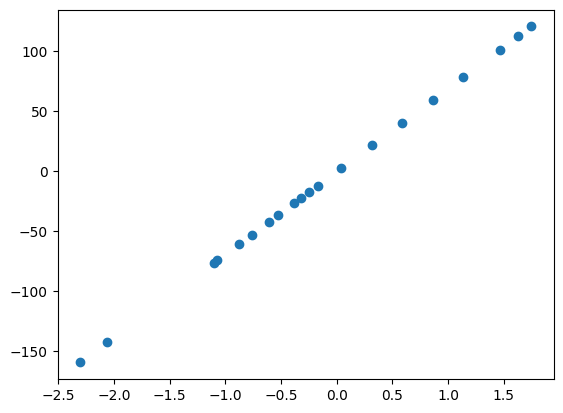

In [4]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [5]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y):
        alpha = 0.5
        errors = [self.error(x, y)]
        for _ in range(self.max_iter):
          dJ0 = sum(self.predict(X) - Y) /len(X)
          dJ1 = sum((self.predict(X) - Y) * X) /len(X)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1

          new_error = self.error(x, y)
          old_error = errors[-1]
          if new_error > old_error:
            alpha /= 2
            self.__init__()

          if old_error - new_error < 0.001:
            break

          errors.append(new_error)
        else:
          print("Ошибка!")
        return errors

In [6]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


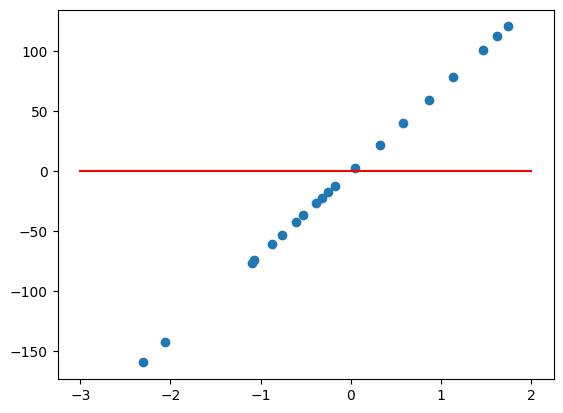

In [7]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [8]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.00035044471700400147


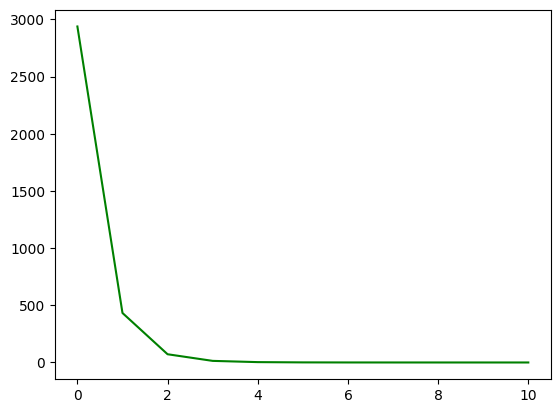

In [9]:
hyp = Model()
errors = hyp.fit(x, y)
plt.plot(errors, 'g')

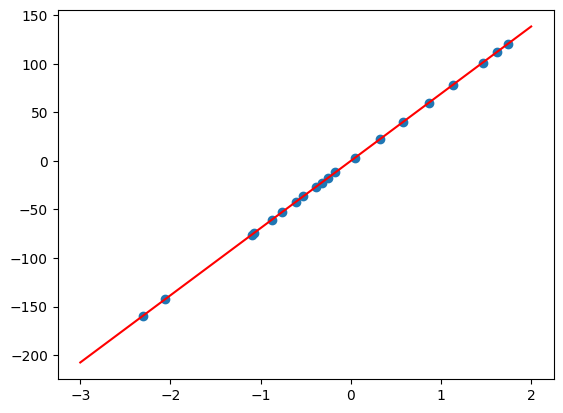

In [10]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

## Задания для самостоятельного выполнения
1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [14]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

error after gradient descent: 0.029007729872320673


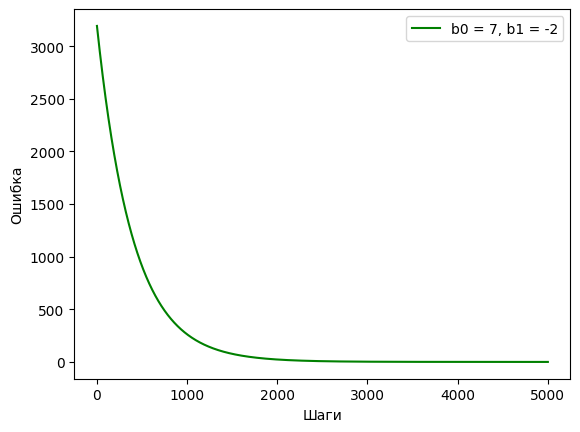

error after gradient descent: 0.03937321303112905


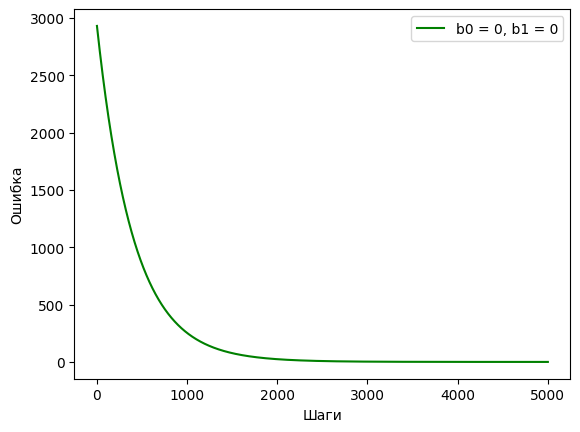

error after gradient descent: 0.03632269468793789


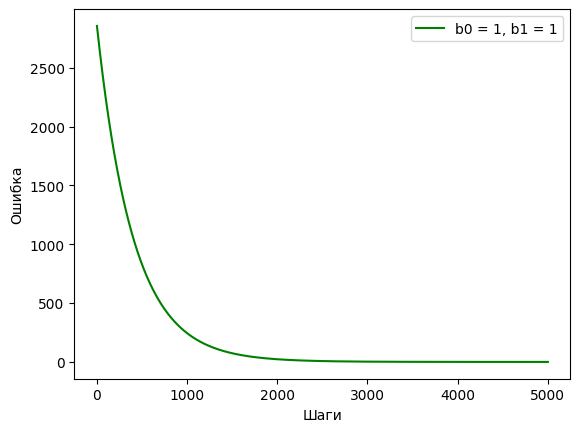

error after gradient descent: 0.011476011490787787


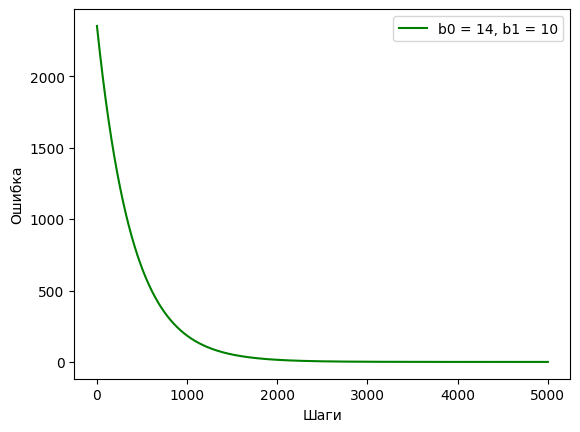

In [15]:
initial_params = [
    (7, -2),
    (0, 0),   # b0 = 0, b1 = 0
    (1, 1),   # b0 = 1, b1 = 1
    (14, 10),  # b0 = -1, b1 = 2
]

# Проверка для каждой комбинации начальных значений
for b0, b1 in initial_params:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y, alpha=0.001)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)
    # Построение графика
    plt.figure()
    plt.plot(steps, errors, 'g', label=f'b0 = {b0}, b1 = {b1}')
    plt.xlabel('Шаги')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()



2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится. 

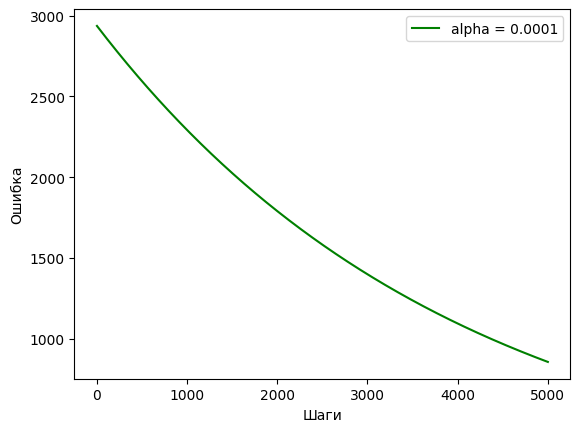

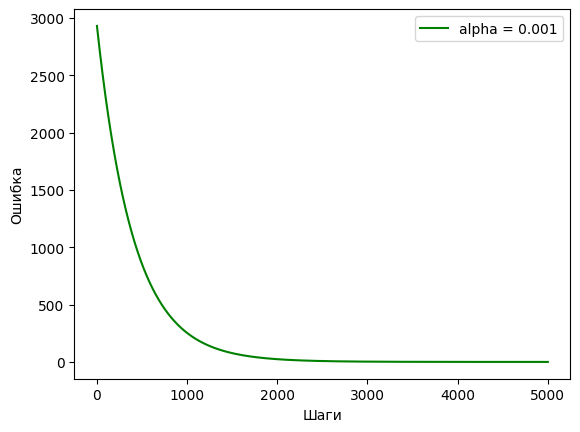

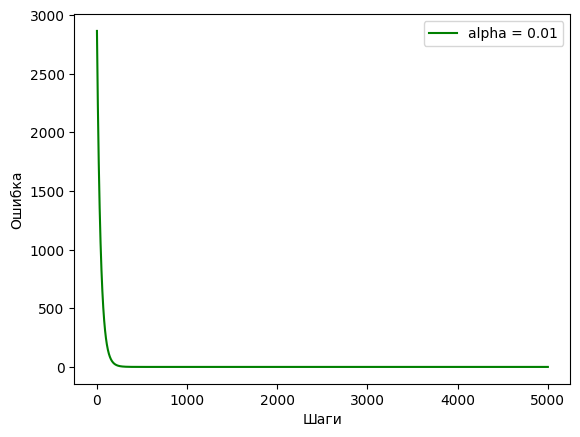

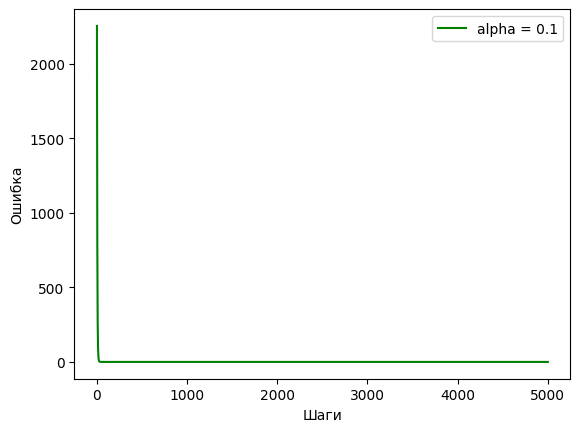

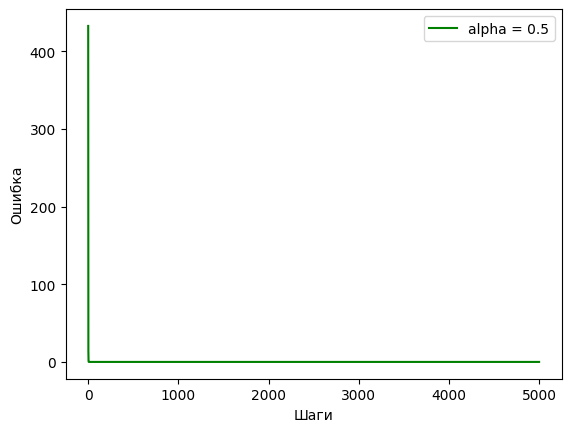

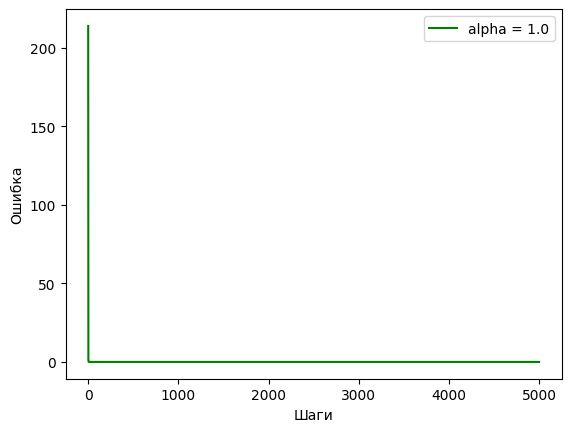

In [16]:
# Значения α для проверки
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]

# Проверка для каждого α
for alpha in alphas:
    hyp = Model(0, 0)
    steps, errors = hyp.fit(x, y, alpha=alpha)
    
    # Построение графика
    plt.figure()
    plt.plot(steps, errors, 'g', label=f'alpha = {alpha}')
    plt.xlabel('Шаги')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()

Модель сходится для всех проверенных шагов alpha. Это подтверждает ее надежность

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спуска таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например. 
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр _alpha_ можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [17]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_delta = 1e-6):
        steps, errors = [], []
        step = 0
        prev_err = None
        start_b0, start_b1 = self.b0, self.b1

        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)

            # Проверяем, увеличилась ли ошибка
            if prev_err is not None and new_err > prev_err:
                # Если ошибка увеличилась, уменьшаем alpha и восстанавливаем параметры
                alpha /= 2
                self.b0, self.b1 = start_b0, start_b1
                continue

            if prev_err is not None and abs(prev_err-new_err) < min_delta:
                print('ended by unsignificant error')
                break
            prev_err=new_err

            step += 1
            steps.append(step)
            errors.append(new_err)
        print('ended by finishing max_steps')
        return steps, errors
    
    def plot(self, steps, errors):
        plt.figure()
        plt.plot(steps, errors)
        plt.xlabel('Шаги')
        plt.ylabel('Ошибка')
        plt.legend()
        plt.show()

Проверим работу построения графиков и механизма адаптивной скорости обучения на разных значениях скорости обучения

alpha = 0.0001
ended by finishing max_steps


C:\Users\Datanomica\AppData\Local\Temp\ipykernel_20496\2104894841.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


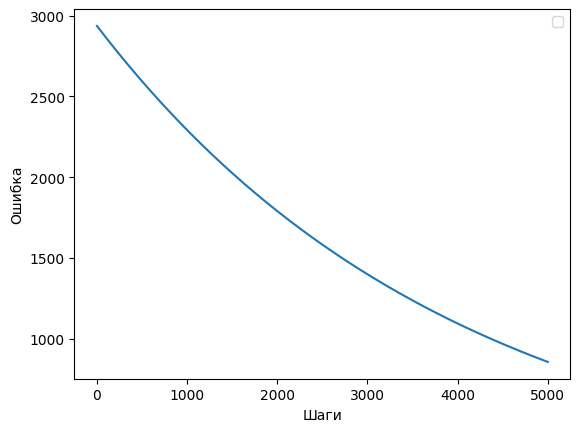

alpha = 0.001
ended by finishing max_steps


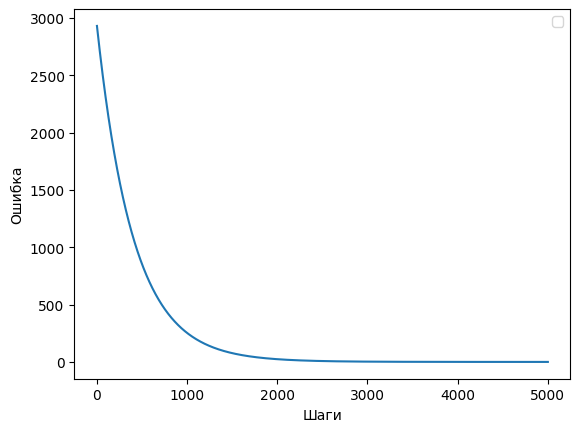

alpha = 0.01
ended by unsignificant error
ended by finishing max_steps


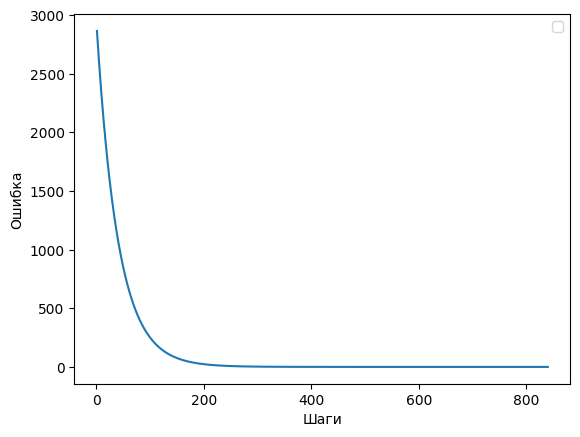

alpha = 0.1
ended by unsignificant error
ended by finishing max_steps


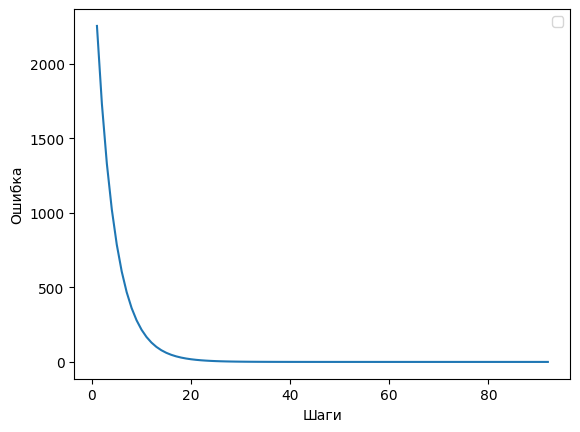

alpha = 0.5
ended by unsignificant error
ended by finishing max_steps


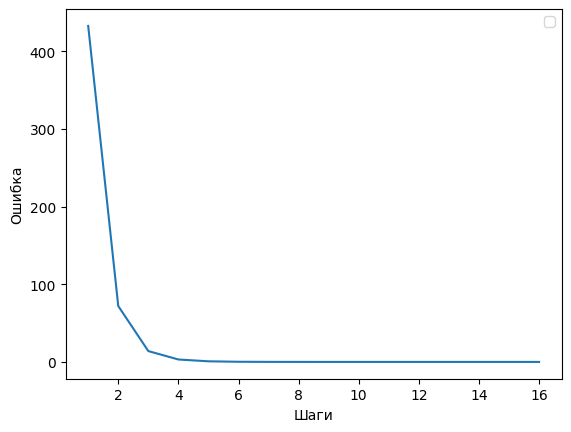

alpha = 1.0
ended by unsignificant error
ended by finishing max_steps


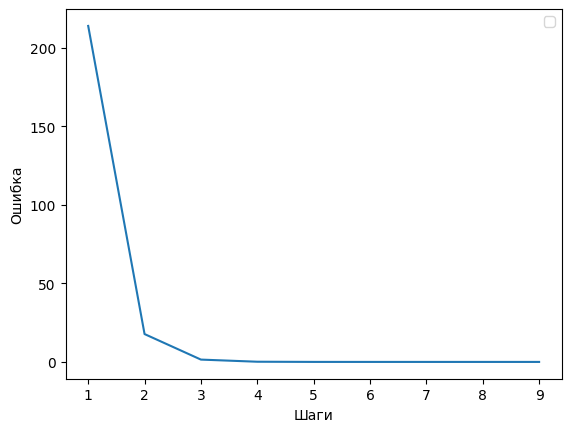

In [18]:
# Проверка для каждого α
for alpha in alphas:
    print(f'alpha = {alpha}')
    hyp = Model(0, 0)
    steps, errors = hyp.fit(x, y, alpha=alpha)
    hyp.plot(steps, errors)